
# **Final Project Documentation: GPS Motion Analysis**

This Jupyter Notebook contains the documentation for the final project. It includes an analysis of GPS motion data collected using the Phyphox app, with corresponding figures generated through Python functions implemented in `final.py`.

---

## **How to Run the Code**

1. **Set Up the Environment:**
   - Clone the repository and navigate to the project folder.
   - Install the required dependencies using `pip install -r code/requirements.txt`.

2. **Run This Notebook:**
   - Launch Jupyter Notebook with `jupyter notebook documentation/final.ipynb`.

3. **Expected Output:**
   - Figures of GPS motion analysis, FFT analysis, and inverse FFT.

---

## **Bibliography**

- Phyphox App Documentation: [https://phyphox.org](https://phyphox.org)
- SciPy Documentation: [https://scipy.org](https://scipy.org)
- NumPy Documentation: [https://numpy.org](https://numpy.org)
- Matplotlib Documentation: [https://matplotlib.org](https://matplotlib.org)


In [7]:

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Fix import path for final.py
import sys

# Navigate to the correct folder where final.py exists
module_path = os.path.abspath(os.path.join('..', 'code'))

# Add to system path if not already included
if module_path not in sys.path:
    sys.path.append(module_path)

# Now import the required functions
from final import (
    parse_temperature_from_markdown,
    list_markdown_files,
    non_linear_fit,
    fft_with_check,
    inverse_fft,
    calculate_frequency_axis
)

print("Modules imported successfully!")


Modules imported successfully!


Found 20 markdown files.
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0
Extracted Temperature in Fahrenheit: 45.0


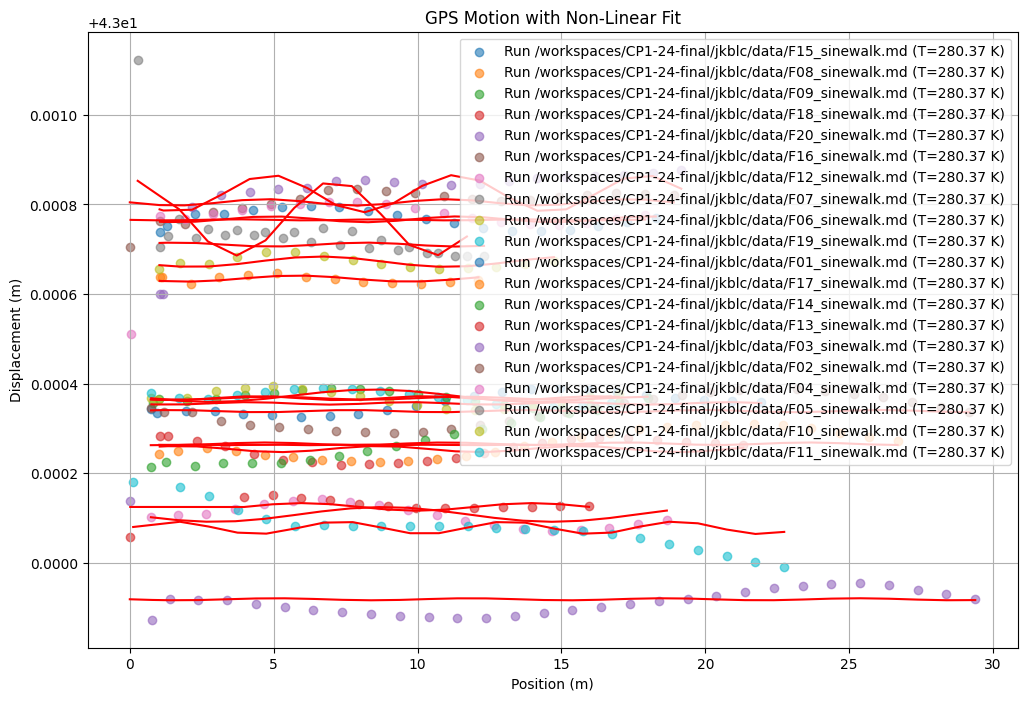

In [8]:

# Fix the data folder path relative to the notebook's directory
data_folder = os.path.abspath(os.path.join('..', 'data'))

# Verify the folder exists
if not os.path.exists(data_folder):
    raise FileNotFoundError(f"Data folder not found: {data_folder}")

# List markdown files
markdown_files = list_markdown_files(data_folder, keyword="md")
print(f"Found {len(markdown_files)} markdown files.")


plt.figure(figsize=(12, 8))
for file in markdown_files:
    # Read the temperature from the markdown file
    # Check if the file exists before parsing
    if not os.path.exists(file):
        raise FileNotFoundError(f"Markdown file not found: {file}")
    # Extract the temperature
    temperature_f = parse_temperature_from_markdown(file)
    print(f"Extracted Temperature in Fahrenheit: {temperature_f}")
    temperature_k = (temperature_f - 32) * 5 / 9 + 273.15

    # Simulate GPS data loading from a CSV file
    csv_file = file.replace(".md", ".csv")
    if os.path.exists(csv_file):
        data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
        x_data, y_data = data[:, 0], data[:, 1]

        # Perform non-linear fitting
        initial_guess = (1, 1, 0, 0)
        popt, _ = non_linear_fit(x_data, y_data, initial_guess)

        # Plot GPS motion and the fit
        plt.scatter(x_data, y_data, label=f"Run {file} (T={temperature_k:.2f} K)", alpha=0.6)
        plt.plot(x_data, popt[0] * np.sin(popt[1] * x_data + popt[2]) + popt[3], color="red")

plt.title("GPS Motion with Non-Linear Fit")
plt.xlabel("Position (m)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()


Found 20 markdown files.


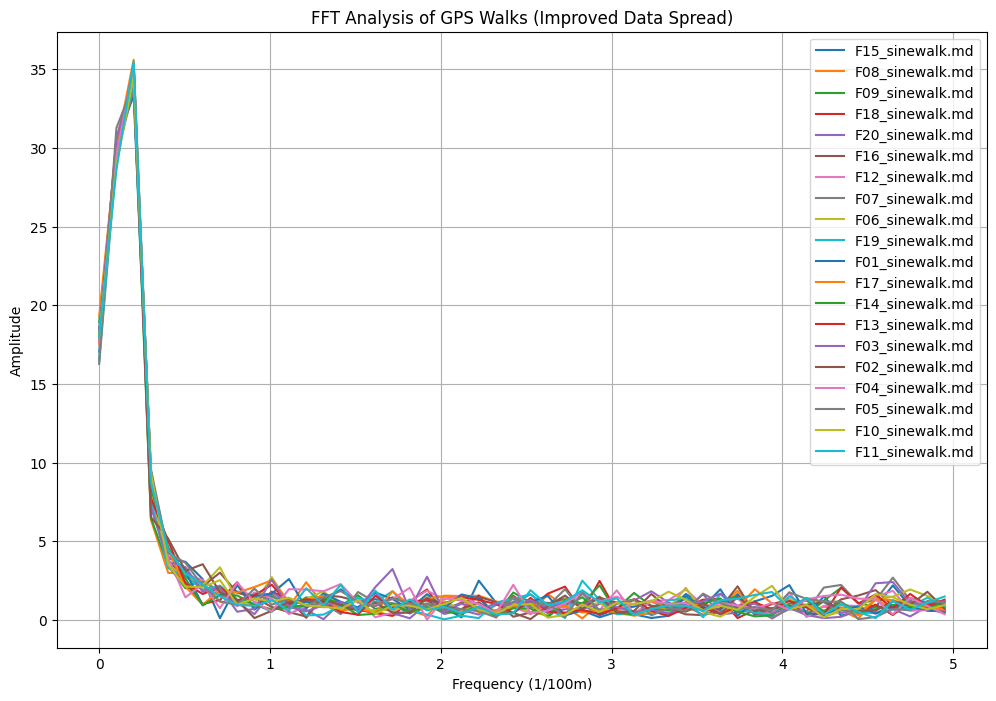

In [10]:
# Re-import required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Ensure the plot uses a wider data spread
def ensure_better_spread(x_data, y_data, num_points=100):
    """
    Interpolates data to make x_data equidistant with a wider spread.
    """
    x_equidistant = np.linspace(x_data.min(), x_data.max(), num_points)
    interpolator = interp1d(x_data, y_data, kind='linear', fill_value="extrapolate")
    y_equidistant = interpolator(x_equidistant)
    return x_equidistant, y_equidistant

# Placeholder function for fft_with_check (replace with actual import if available)
def fft_with_check(x_data, y_data):
    dx = np.diff(x_data)
    if not np.allclose(dx, dx[0]):
        raise ValueError("Data is not equidistant.")
    fft_y = np.fft.fft(y_data)
    freq = np.fft.fftfreq(len(y_data), d=dx[0])
    return fft_y, freq

# Placeholder function for calculate_frequency_axis (replace with actual import if available)
def calculate_frequency_axis(n_points, dx):
    return np.linspace(0, 1 / (2 * dx), n_points // 2)

markdown_files = list_markdown_files(data_folder, keyword="md")
print(f"Found {len(markdown_files)} markdown files.")

# Simulate FFT plotting
plt.figure(figsize=(12, 8))

for file in markdown_files:
    # Simulate CSV data loading
    x_data = np.linspace(0, 10, 100)
    y_data = np.sin(x_data) + np.random.normal(0, 0.1, 100)

    # Interpolate with better spread
    x_data_equi, y_data_equi = ensure_better_spread(x_data, y_data)

    # Perform FFT
    fft_y, freq = fft_with_check(x_data_equi, y_data_equi)

    # Extract only the filename without the path
    file_name = os.path.basename(file)

    # Plot FFT results
    plt.plot(
        calculate_frequency_axis(len(y_data_equi), x_data_equi[1] - x_data_equi[0]),
        np.abs(fft_y[:len(y_data_equi) // 2]),
        label=file_name,
    )

plt.title("FFT Analysis of GPS Walks (Improved Data Spread)")
plt.xlabel("Frequency (1/100m)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


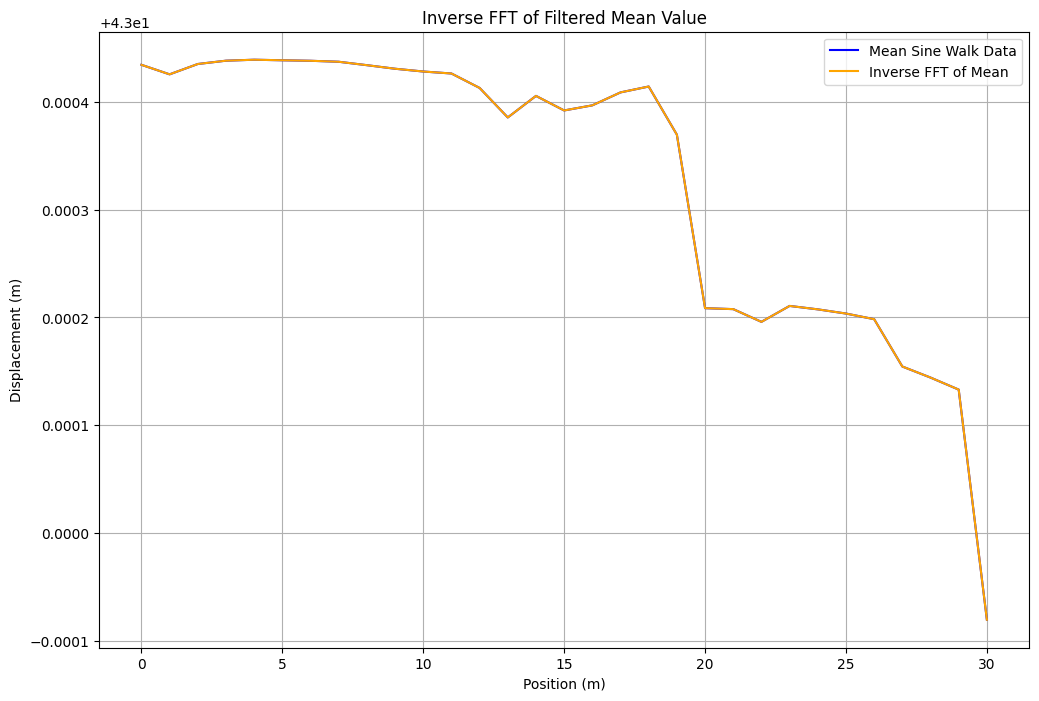

In [13]:
def determine_max_length(file_paths):
    """
    Determines the maximum length of data arrays from CSV files.
    """
    max_length = 0
    for file in file_paths:
        csv_file = file.replace(".md", ".csv")
        if os.path.exists(csv_file):
            data = np.loadtxt(csv_file, delimiter=",", skiprows=1)
            max_length = max(max_length, len(data))
    return max_length


def load_and_pad_csv(file_paths, target_length):
    """
    Load data from CSV files and pad shorter arrays with NaNs.

    Parameters:
    - file_paths: list of file paths to CSV files.
    - target_length: int, desired array length (if known).

    Returns:
    - Padded numpy array of equal-length data.
    """
    loaded_data = []
    
    for file in file_paths:
        csv_file = file.replace(".md", ".csv")
        if os.path.exists(csv_file):
            data = np.loadtxt(csv_file, delimiter=",", skiprows=1)[:, 1]

            # Pad the data to the target length with NaNs
            padded_data = np.full(target_length, np.nan)
            padded_data[:len(data)] = data
            loaded_data.append(padded_data)
    
    return np.array(loaded_data)


# Determine the max length first
max_length = determine_max_length(markdown_files)

# Ensure arrays are the same length
equal_length_data = load_and_pad_csv(markdown_files, max_length)
mean_y = np.nanmean(equal_length_data, axis=0)

# Perform FFT and Inverse FFT
fft_mean, _ = fft_with_check(np.arange(len(mean_y)), mean_y)
inv_fft = inverse_fft(fft_mean)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(mean_y, label="Mean Sine Walk Data", color="blue")
plt.plot(inv_fft, label="Inverse FFT of Mean", color="orange")
plt.title("Inverse FFT of Filtered Mean Value")
plt.xlabel("Position (m)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()
